In [1]:
# setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Subway ridership for 5 stations on 10 different days
ridership = np.array([
    [   0,    0,    2,    5,    0],
    [1478, 3877, 3674, 2328, 2539],
    [1613, 4088, 3991, 6461, 2691],
    [1560, 3392, 3826, 4787, 2613],
    [1608, 4802, 3932, 4477, 2705],
    [1576, 3933, 3909, 4979, 2685],
    [  95,  229,  255,  496,  201],
    [   2,    0,    1,   27,    0],
    [1438, 3785, 3589, 4174, 2215],
    [1342, 4043, 4009, 4665, 3033]
])

def mean_riders_for_max_station(ridership):
    '''
    Fill in this function to find the station with the maximum riders on the
    first day, then return the mean riders per day for that station. Also
    return the mean ridership overall for comparsion.
    
    Hint: NumPy's argmax() function might be useful:
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html
    '''
    max_first_day = np.argmax(ridership[0,:])
    mean_for_max = np.mean(ridership[:,max_first_day], axis=0)
    overall_mean = np.mean(ridership)
    
    return (overall_mean, mean_for_max)

In [3]:
mean_riders_for_max_station(ridership)

(2342.5999999999999, 3239.9000000000001)

In [4]:
# Subway ridership for 5 stations on 10 different days
ridership = np.array([
    [   0,    0,    2,    5,    0],
    [1478, 3877, 3674, 2328, 2539],
    [1613, 4088, 3991, 6461, 2691],
    [1560, 3392, 3826, 4787, 2613],
    [1608, 4802, 3932, 4477, 2705],
    [1576, 3933, 3909, 4979, 2685],
    [  95,  229,  255,  496,  201],
    [   2,    0,    1,   27,    0],
    [1438, 3785, 3589, 4174, 2215],
    [1342, 4043, 4009, 4665, 3033]
])

def min_and_max_riders_per_day(ridership):
    '''
    Fill in this function. First, for each subway station, calculate the
    mean ridership per day. Then, out of all the subway stations, return the
    maximum and minimum of these values. That is, find the maximum
    mean-ridership-per-day and the minimum mean-ridership-per-day for any
    subway station.
    '''
    mean_ridership_per_station = np.mean(ridership, axis=0)
    max_daily_ridership = np.max(mean_ridership_per_station)
    min_daily_ridership = np.min(mean_ridership_per_station)
    
    return (max_daily_ridership, min_daily_ridership)

In [5]:
min_and_max_riders_per_day(ridership)

(3239.9000000000001, 1071.2)

In [6]:
# Subway ridership for 5 stations on 10 different days
ridership_df = pd.DataFrame(
    data=[[   0,    0,    2,    5,    0],
          [1478, 3877, 3674, 2328, 2539],
          [1613, 4088, 3991, 6461, 2691],
          [1560, 3392, 3826, 4787, 2613],
          [1608, 4802, 3932, 4477, 2705],
          [1576, 3933, 3909, 4979, 2685],
          [  95,  229,  255,  496,  201],
          [   2,    0,    1,   27,    0],
          [1438, 3785, 3589, 4174, 2215],
          [1342, 4043, 4009, 4665, 3033]],
    index=['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
           '05-06-11', '05-07-11', '05-08-11', '05-09-11', '05-10-11'],
    columns=['R003', 'R004', 'R005', 'R006', 'R007']
)
    
def mean_riders_for_max_station(ridership):
    '''
    Fill in this function to find the station with the maximum riders on the
    first day, then return the mean riders per day for that station. Also
    return the mean ridership overall for comparsion.
    
    This is the same as a previous exercise, but this time the
    input is a Pandas DataFrame rather than a 2D NumPy array.
    '''
    max_first_day = ridership_df.iloc[0].argmax()
    mean_for_max = ridership_df[max_first_day].mean()
    overall_mean = ridership_df.values.mean()
    
    return (overall_mean, mean_for_max)

In [7]:
mean_riders_for_max_station(ridership)

(2342.5999999999999, 3239.9)

In [8]:
filename = './nyc_subway_weather.csv'
subway_df = pd.read_csv(filename)

def correlation(x, y):
    '''
    Fill in this function to compute the correlation between the two
    input variables. Each input is either a NumPy array or a Pandas
    Series.
    
    correlation = average of (x in standard units) times (y in standard units)
    
    Remember to pass the argument "ddof=0" to the Pandas std() function!
    '''
    
    # mean of x
    u_x = x.mean()
    
    # mean of y
    u_y = y.mean()
    
    # std. deviation of x
    s_x = x.std(ddof=0)
    
    # std. deviation of y
    s_y = y.std(ddof=0)
    
    # calculate z-score of x
    z_x = (x - u_x) / s_x
    
    # calculate z-score of y
    z_y = (y - u_y) / s_y
    
    # calculate correlation, average(z_x) * average(z_y)
    corr = (z_x * z_y).mean()
    
    return corr

entries = subway_df['ENTRIESn_hourly']
cum_entries = subway_df['ENTRIESn']
rain = subway_df['meanprecipi']
temp = subway_df['meantempi']

print(correlation(entries, rain))
print(correlation(entries, temp))
print(correlation(rain, temp))

print(correlation(entries, cum_entries))

0.03564851577223041
-0.026693348321569912
-0.22903432340833663
0.5858954707662182


In [9]:
# Cumulative entries and exits for one station for a few hours
entries_and_exits = pd.DataFrame({
    'ENTRIESn': [3144312, 3144335, 3144353, 3144424, 3144594,
                 3144808, 3144895, 3144905, 3144941, 3145094],
    'EXITSn': [1088151, 1088159, 1088177, 1088231, 1088275,
               1088317, 1088328, 1088331, 1088420, 1088753]
})
    
def get_hourly_entries_and_exits(entries_and_exits):
    '''
    Fill in this function to take a DataFrame with cumulative entries
    and exits (entries in the first column, exits in the second) and
    return a DataFrame with hourly entries and exits (entries in the
    first column, exits in the second).
    '''
    return entries_and_exits - entries_and_exits.shift(1, axis=0)

In [10]:
get_hourly_entries_and_exits(entries_and_exits)

,ENTRIESn,EXITSn
0,NaN,NaN
1,23.0,8.0
2,18.0,18.0
3,71.0,54.0
4,170.0,44.0
5,214.0,42.0
6,87.0,11.0
7,10.0,3.0
8,36.0,89.0
9,153.0,333.0


In [11]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)
    
def convert_grades(grades):
    '''
    Fill in this function to convert the given DataFrame of numerical
    grades to letter grades. Return a new DataFrame with the converted
    grade.
    
    The conversion rule is:
        90-100 -> A
        80-89  -> B
        70-79  -> C
        60-69  -> D
        0-59   -> F
    '''
    def apply_conv_rule(score):
        if score >= 90:
            return "A"
        elif score < 90 and score >= 80:
            return "B"
        elif score < 80 and score >= 70:
            return "C"
        elif score < 70 and score >= 60:
            return "D"
        else:
            return "F"
        
    return grades.applymap(apply_conv_rule)

In [12]:
convert_grades(grades_df)

,exam1,exam2
Andre,F,F
Barry,B,D
Chris,C,F
Dan,C,F
Emilio,B,D
Fred,C,F
Greta,A,C
Humbert,D,F
Ivan,A,C
James,B,D


In [13]:
grades = pd.DataFrame(
    {0: [90, 80, 70, 60, 50], 1: [89, 79, 69, 59, 49]},
    index=[0, 1, 2, 3, 4]
)

In [14]:
grades

,0,1
0,90,89
1,80,79
2,70,69
3,60,59
4,50,49


In [15]:
convert_grades(grades)

,0,1
0,A,B
1,B,C
2,C,D
3,D,F
4,F,F


In [16]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)
    
def standardize(df):
    '''
    Fill in this function to standardize each column of the given
    DataFrame. To standardize a variable, convert each value to the
    number of standard deviations it is above or below the mean.
    '''
    def z_score(x):
        return (x - x.mean()) / x.std(ddof=0)
        
    return df.apply(z_score)

In [17]:
grades_df

,exam1,exam2
Andre,43,24
Barry,81,63
Chris,78,56
Dan,75,56
Emilio,89,67
Fred,70,51
Greta,91,79
Humbert,65,46
Ivan,98,72
James,87,60


In [18]:
print(
    grades_df["exam1"].mean(),
    grades_df["exam1"].std(ddof=0))

77.7 14.986994361779146


In [19]:
standardize(grades_df)

,exam1,exam2
Andre,-2.315341,-2.304599
Barry,0.220191,0.386400
Chris,0.020017,-0.096600
Dan,-0.180156,-0.096600
Emilio,0.753987,0.662400
Fred,-0.513779,-0.441600
Greta,0.887436,1.490400
Humbert,-0.847401,-0.786600
Ivan,1.354508,1.007400
James,0.620538,0.179400


In [20]:
df = pd.DataFrame({
    'a': [4, 5, 3, 1, 2],
    'b': [20, 10, 40, 50, 30],
    'c': [25, 20, 5, 15, 10]
})
    
def second_largest(df):
    '''
    Fill in this function to return the second-largest value of each 
    column of the input DataFrame.
    '''
    def second_largest_by_column(column):
        return column.sort_values(ascending = False).iloc[1]
        
    return df.apply(second_largest_by_column)

In [21]:
second_largest(df)

a     4
b    40
c    20
dtype: int64

In [22]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

def standardize(df):
    '''
    Fill in this function to standardize each column of the given
    DataFrame. To standardize a variable, convert each value to the
    number of standard deviations it is above or below the mean.
    
    This time, try to use vectorized operations instead of apply().
    You should get the same results as you did before.
    '''
    u = df.mean()
    s = df.std(ddof=0)
    nominator = df.sub(u)
    z = nominator.div(s)
    return z

def standardize_rows(df):
    '''
    Optional: Fill in this function to standardize each row of the given
    DataFrame. Again, try not to use apply().
    
    This one is more challenging than standardizing each column!
    '''
    u = df.mean(axis="columns")
    s = df.std(ddof=0, axis="columns")
    nominator = df.sub(u, axis="index")
    z = nominator.div(s, axis="index")
    return z

In [23]:
standardize(grades_df)

,exam1,exam2
Andre,-2.315341,-2.304599
Barry,0.220191,0.386400
Chris,0.020017,-0.096600
Dan,-0.180156,-0.096600
Emilio,0.753987,0.662400
Fred,-0.513779,-0.441600
Greta,0.887436,1.490400
Humbert,-0.847401,-0.786600
Ivan,1.354508,1.007400
James,0.620538,0.179400


In [24]:
standardize_rows(grades_df)

,exam1,exam2
Andre,1.0,-1.0
Barry,1.0,-1.0
Chris,1.0,-1.0
Dan,1.0,-1.0
Emilio,1.0,-1.0
Fred,1.0,-1.0
Greta,1.0,-1.0
Humbert,1.0,-1.0
Ivan,1.0,-1.0
James,1.0,-1.0


In [25]:
filename = './nyc_subway_weather.csv'
subway_df = pd.read_csv(filename)

### Write code here to group the subway data by a variable of your choice, then
### either print out the mean ridership within each group or create a plot.

In [26]:
subway_df.head

<bound method DataFrame.head of        UNIT     DATEn     TIMEn  ENTRIESn   EXITSn  ENTRIESn_hourly  \
0      R003  05-01-11  00:00:00   4388333  2911002              0.0   
1      R003  05-01-11  04:00:00   4388333  2911002              0.0   
2      R003  05-01-11  12:00:00   4388333  2911002              0.0   
3      R003  05-01-11  16:00:00   4388333  2911002              0.0   
4      R003  05-01-11  20:00:00   4388333  2911002              0.0   
5      R003  05-02-11  00:00:00   4388348  2911036             15.0   
6      R003  05-02-11  04:00:00   5818689  3874767             19.0   
7      R003  05-02-11  08:00:00   4388855  2911194            488.0   
8      R003  05-02-11  12:00:00   4389345  2911326            490.0   
9      R003  05-02-11  16:00:00   4389576  2911558            231.0   
10     R003  05-02-11  20:00:00   4389811  2911963            235.0   
11     R003  05-03-11  00:00:00   4389885  2912127             74.0   
12     R003  05-03-11  04:00:00   4389905  29

In [27]:
grouped_subway_df = subway_df.groupby("day_week")
grouped_subway_df["ENTRIESn_hourly"].mean()

day_week
0    1825.264907
1    2164.836433
2    2297.097957
3    2317.072379
4    2277.372294
5    1383.901479
6    1066.436106
Name: ENTRIESn_hourly, dtype: float64

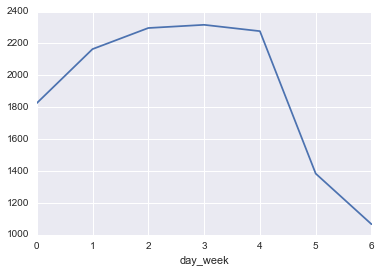

In [28]:
grouped_subway_df["ENTRIESn_hourly"].mean().plot()

In [41]:
def get_hourly_entries_and_exits2(subway_df):
    """
    Calculates hourly entries and exits for the entire nyc_subway_weather data set
    """
    grouped_df = subway_df.groupby(["UNIT", "day_week"])
    return grouped_df[["ENTRIESn", "EXITSn"]].apply(get_hourly_entries_and_exits)

In [42]:
get_hourly_entries_and_exits2(subway_df)

,ENTRIESn,EXITSn
0,NaN,NaN
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,NaN,NaN
6,1430341.0,963731.0
7,-1429834.0,-963573.0
8,490.0,132.0
9,231.0,232.0


In [45]:
ridership_df = pd.DataFrame({
    'UNIT': ['R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051'],
    'TIMEn': ['00:00:00', '02:00:00', '04:00:00', '06:00:00', '08:00:00', '10:00:00', '12:00:00', '14:00:00', '16:00:00'],
    'ENTRIESn': [3144312, 8936644, 3144335, 8936658, 3144353, 8936687, 3144424, 8936819, 3144594],
    'EXITSn': [1088151, 13755385,  1088159, 13755393,  1088177, 13755598, 1088231, 13756191,  1088275]
})

def get_hourly_entries_and_exits3(entries_and_exits):
    '''
    Fill in this function to take a DataFrame with cumulative entries
    and exits and return a DataFrame with hourly entries and exits.
    The hourly entries and exits should be calculated separately for
    each station (the 'UNIT' column).
    '''
    def shift_helper(df):
        return df - df.shift(1, axis=0)
    
    grouped_df = entries_and_exits.groupby("UNIT")
    return grouped_df[["ENTRIESn", "EXITSn"]].apply(shift_helper)

In [46]:
get_hourly_entries_and_exits3(ridership_df)

,ENTRIESn,EXITSn
0,NaN,NaN
1,NaN,NaN
2,23.0,8.0
3,14.0,8.0
4,18.0,18.0
5,29.0,205.0
6,71.0,54.0
7,132.0,593.0
8,170.0,44.0


In [53]:
subway_df = pd.DataFrame({
    'UNIT': ['R003', 'R003', 'R003', 'R003', 'R003', 'R004', 'R004', 'R004',
             'R004', 'R004'],
    'DATEn': ['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
              '05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'ENTRIESn': [ 4388333,  4388348,  4389885,  4391507,  4393043, 14656120,
                 14656174, 14660126, 14664247, 14668301],
    'EXITSn': [ 2911002,  2911036,  2912127,  2913223,  2914284, 14451774,
               14451851, 14454734, 14457780, 14460818],
    'latitude': [ 40.689945,  40.689945,  40.689945,  40.689945,  40.689945,
                  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ],
    'longitude': [-73.872564, -73.872564, -73.872564, -73.872564, -73.872564,
                  -73.867135, -73.867135, -73.867135, -73.867135, -73.867135]
})

weather_df = pd.DataFrame({
    'DATEn': ['05-01-11', '05-01-11', '05-02-11', '05-02-11', '05-03-11',
              '05-03-11', '05-04-11', '05-04-11', '05-05-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'latitude': [ 40.689945,  40.69132 ,  40.689945,  40.69132 ,  40.689945,
                  40.69132 ,  40.689945,  40.69132 ,  40.689945,  40.69132 ],
    'longitude': [-73.872564, -73.867135, -73.872564, -73.867135, -73.872564,
                  -73.867135, -73.872564, -73.867135, -73.872564, -73.867135],
    'pressurei': [ 30.24,  30.24,  30.32,  30.32,  30.14,  30.14,  29.98,  29.98,
                   30.01,  30.01],
    'fog': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'rain': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'tempi': [ 52. ,  52. ,  48.9,  48.9,  54. ,  54. ,  57.2,  57.2,  48.9,  48.9],
    'wspdi': [  8.1,   8.1,   6.9,   6.9,   3.5,   3.5,  15. ,  15. ,  15. ,  15. ]
})

def combine_dfs(subway_df, weather_df):
    '''
    Fill in this function to take 2 DataFrames, one with subway data and one with weather data,
    and return a single dataframe with one row for each date, hour, and location. Only include
    times and locations that have both subway data and weather data available.
    '''
    merged_df = subway_df.merge(weather_df, how="inner", on=["DATEn", "hour", "latitude", "longitude"])
    return merged_df

In [59]:
combine_dfs(subway_df, weather_df)

,DATEn,ENTRIESn,EXITSn,UNIT,hour,latitude,longitude,fog,pressurei,rain,tempi,wspdi
0,05-01-11,4388333,2911002,R003,0,40.689945,-73.872564,0,30.24,0,52.0,8.1
1,05-02-11,4388348,2911036,R003,0,40.689945,-73.872564,0,30.32,0,48.9,6.9
2,05-03-11,4389885,2912127,R003,0,40.689945,-73.872564,0,30.14,0,54.0,3.5
3,05-04-11,4391507,2913223,R003,0,40.689945,-73.872564,0,29.98,0,57.2,15.0
4,05-05-11,4393043,2914284,R003,0,40.689945,-73.872564,0,30.01,0,48.9,15.0
5,05-01-11,14656120,14451774,R004,0,40.691320,-73.867135,0,30.24,0,52.0,8.1
6,05-02-11,14656174,14451851,R004,0,40.691320,-73.867135,0,30.32,0,48.9,6.9
7,05-03-11,14660126,14454734,R004,0,40.691320,-73.867135,0,30.14,0,54.0,3.5
8,05-04-11,14664247,14457780,R004,0,40.691320,-73.867135,0,29.98,0,57.2,15.0
9,05-05-11,14668301,14460818,R004,0,40.691320,-73.867135,0,30.01,0,48.9,15.0


In [58]:
merged_df = combine_dfs(subway_df, weather_df)

In [67]:
merged_df.columns

Index(['DATEn', 'ENTRIESn', 'EXITSn', 'UNIT', 'hour', 'latitude', 'longitude',
       'fog', 'pressurei', 'rain', 'tempi', 'wspdi'],
      dtype='object')

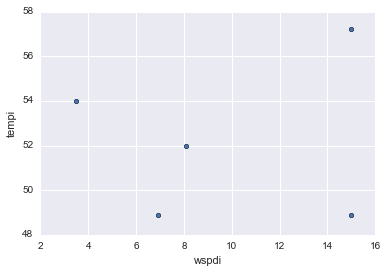

In [71]:
merged_df.plot(kind="scatter", x="wspdi", y="tempi")